In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imporing data
telecom=pd.read_csv(r"C:\Users\Aaqui\Desktop\Data Science\Data Science with python\Projects\Project 4- Comcast Telecom consumer complaints\1568699544_comcast_telecom_complaints_data\Comcast_telecom_complaints_data.csv")
telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
telecom.columns.values[0]='Ticket ID'

##### Exploring the data set 

In [4]:
telecom.shape

(2224, 11)

In [5]:
telecom.dtypes

Ticket ID                      object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [103]:
telecom.size

24464

In [6]:
type(telecom)

pandas.core.frame.DataFrame

In [16]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket ID                    2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  Day                          2224 non-null 

In [7]:
telecom.isna().sum()

Ticket ID                      0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [8]:
telecom.columns

Index(['Ticket ID', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [9]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip code,2224.0,47994.393435,28885.279427,1075.0,30056.5,37211.0,77058.75,99223.0


##### Clearly there is  zero null values. So moving a head with problem statement 

#### 1. Problem statement
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types. 

In [10]:
from datetime import datetime
telecom['Date']= pd.to_datetime(telecom['Date']);
telecom['Date_month_year']=pd.to_datetime(telecom['Date_month_year']);
telecom.dtypes

Ticket ID                              object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [11]:
telecom["Customer Complaint"].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [12]:
telecom['Date_month_year'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-10-05      7
2015-05-24      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

<AxesSubplot:>

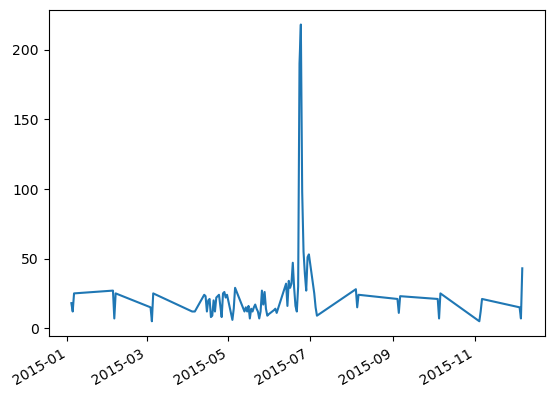

In [13]:
telecom['Date_month_year'].value_counts().plot()

##### Assigning day, month and year column for ease of visualization 

In [14]:
telecom['Day']=pd.DatetimeIndex(telecom['Date_month_year']).day
telecom['Month']=pd.DatetimeIndex(telecom['Date_month_year']).month
telecom['Year']=pd.DatetimeIndex(telecom['Date_month_year']).year

In [15]:
telecom.head()

,Ticket ID,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015


1. Customer Complaint on monthly basis

[Text(0.5, 1.0, 'Number of Monthly Complaints')]

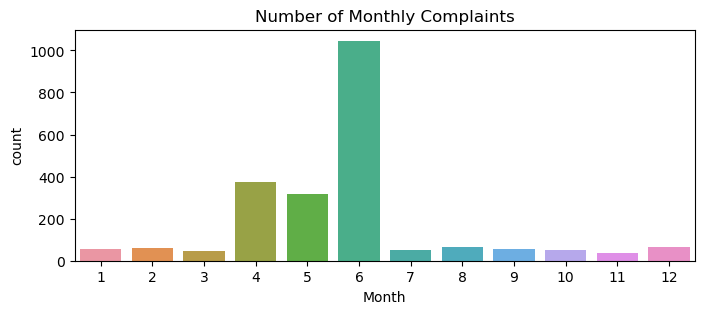

In [17]:
plt.figure(figsize=(8,3),dpi=100)
sns.countplot(data=telecom, x='Month').set(title='Number of Monthly Complaints')

In [18]:
telecom['Month'].unique()

array([ 4,  8,  7,  5, 12,  6,  1, 11,  2,  9,  3, 10], dtype=int64)

In [19]:
telecom['Month'].nunique()

12

In [20]:
sorted(telecom['Month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [21]:
telecom.groupby(['Month']).size()

Month
1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
dtype: int64

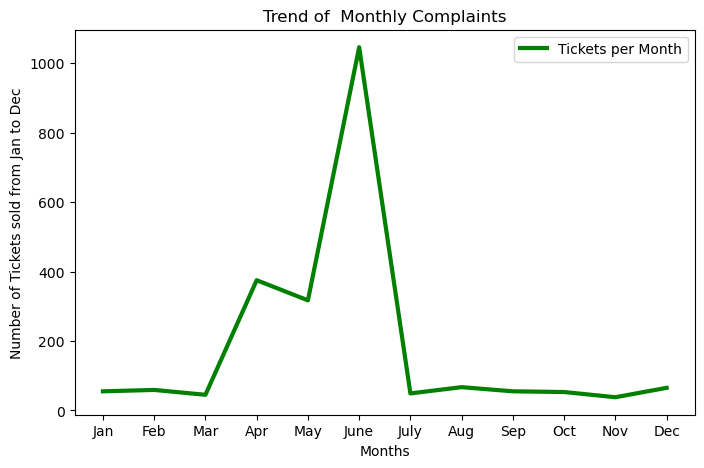

In [22]:
plt.figure(figsize=(8,5),dpi=100)
plt.plot(sorted(telecom['Month'].unique()), telecom.groupby(['Month']).size(), color='g', linestyle='-', linewidth=3, label='Tickets per Month')
plt.xticks(sorted(telecom['Month'].unique()),
           ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']);
plt.xlabel('Months')
plt.ylabel('Number of Tickets sold from Jan to Dec')
plt.title('Trend of  Monthly Complaints')
plt.legend()

2. Customer Complaint on Daily basis

[Text(0.5, 1.0, 'Number of Daily Complaints')]

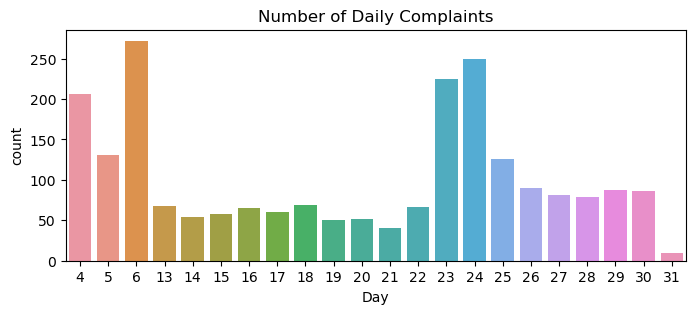

In [23]:
plt.figure(figsize=(8,3),dpi=100)
sns.countplot(data=telecom, x='Day').set(title='Number of Daily Complaints')

In [24]:
telecom['Day'].nunique()

22

In [25]:
telecom['Day'].unique()

array([22,  4, 18,  5, 26,  6, 24, 23, 28, 13, 30, 27, 16, 29, 19, 20, 21,
       14, 15, 25, 17, 31], dtype=int64)

In [26]:
telecom.groupby(['Day']).size()

Day
4     206
5     131
6     272
13     68
14     54
15     58
16     65
17     60
18     69
19     50
20     51
21     41
22     66
23    225
24    249
25    126
26     90
27     81
28     79
29     87
30     86
31     10
dtype: int64

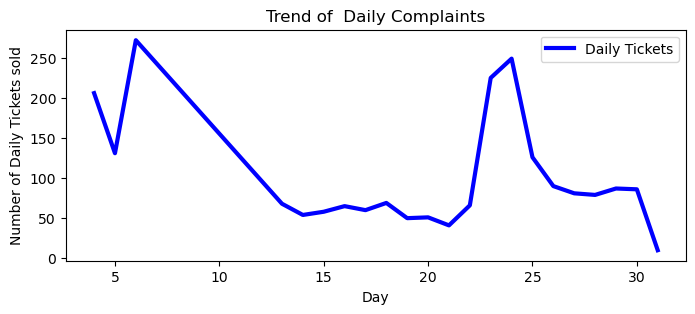

In [27]:
plt.figure(figsize=(8,3),dpi=100)
plt.plot(sorted(telecom['Day'].unique()), telecom.groupby(['Day']).size(), color='b', linestyle='-', linewidth=3, label='Daily Tickets')
plt.xlabel('Day')
plt.ylabel('Number of Daily Tickets sold')
plt.title('Trend of  Daily Complaints')
plt.legend()

3. Provide a table with the frequency of complaint types.

In [28]:
telecom['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [29]:
telecom["Complaint Category"] = np.where(telecom["Customer Complaint"].str.contains('Internet|Speed|wifi|Access|Throttling|throt|Broadband|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
         np.where(telecom["Customer Complaint"].str.contains('\$|Price|Pricing|Cost|Payment|Charg|pay|Bill|Billing|Rate|Contract|fee',case=False,regex=True), 'Billing',
         np.where(telecom["Customer Complaint"].str.contains('Service|Cap|usage|Data|Customer|switch|wait|support|TV|avail|network|cramming',case=False,regex=True), 'Network',
         np.where(telecom["Customer Complaint"].str.contains('Customer|complaint|breach|bully|False|fed up',case=False,regex=True), 'Grievance',
         np.where(telecom["Customer Complaint"].str.contains('email',case=False,regex=True), 'Email',
         np.where(telecom["Customer Complaint"].str.contains('outage',case=False,regex=True), 'Outages',
         'Other'))))))

In [30]:
complaint_category=telecom.groupby('Complaint Category')['Ticket ID'].count().sort_values(ascending=False)

In [48]:
perc_complaint_category=telecom.groupby('Complaint Category')['Ticket ID'].count().sort_values(ascending=False)*1841/100
perc_complaint_category
#As we are having total 2224 complaint values

Complaint Category
Internet     14065.24
Billing      10180.73
Network       8137.22
Other         7548.10
Grievance      773.22
Email          147.28
Outages         92.05
Name: Ticket ID, dtype: float64

In [32]:
pct_comp_categ=pd.DataFrame({"Total Complaints" : complaint_category, "Percentage Complaint" : perc_complaint_category})
pct_comp_categ

,Total Complaints,Percentage Complaint
Complaint Category,,
Internet,764,14065.24
Billing,553,10180.73
Network,442,8137.22
Other,410,7548.10
Grievance,42,773.22
Email,8,147.28
Outages,5,92.05


<AxesSubplot:xlabel='Complaint Category', ylabel='count'>

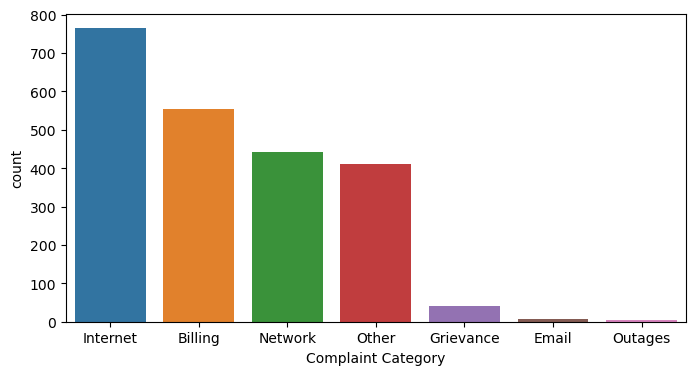

In [33]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=telecom, x='Complaint Category', order= telecom['Complaint Category'].value_counts().index)

In [34]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket ID                    2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  Day                          2224 non-null 

####  B- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on: 

In [35]:
telecom.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [36]:
telecom["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in telecom["Status"]]

In [37]:
pd.DataFrame(telecom.groupby('newStatus')['Ticket ID'].count())

,Ticket ID
newStatus,
Closed,1707
Open,517


B:2- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on: 

In [38]:
pd.DataFrame(telecom.groupby('State')['newStatus'].count().sort_values(ascending=False))

,newStatus
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


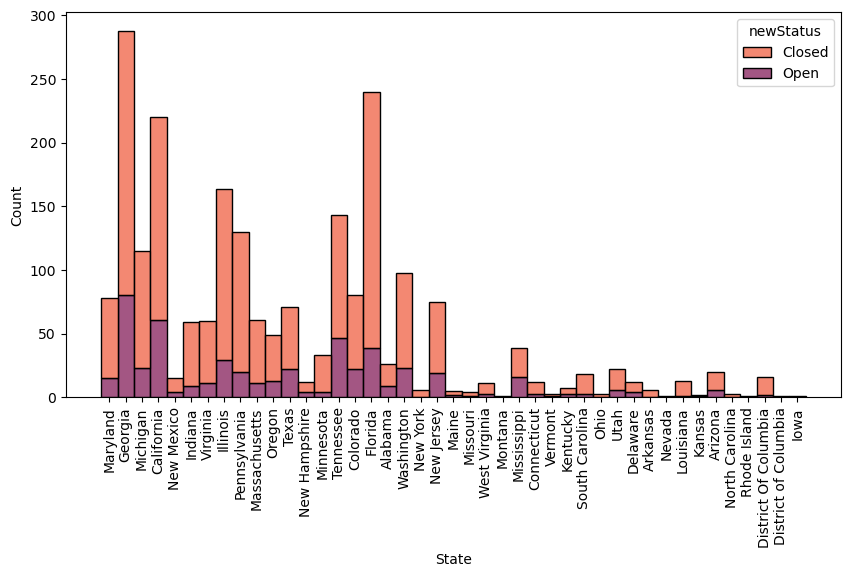

In [39]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(binwidth=0.5, x='State', hue='newStatus', palette= 'rocket_r', data=telecom, stat='count', 
             multiple='stack').tick_params(axis='x', rotation=90)

### C- Which state has the maximum complaints 

In [40]:
pd.DataFrame(telecom.groupby('State')['newStatus'].count().sort_values(ascending=False))

,newStatus
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


Clearly Georgia has maximum number of complaint

In [41]:
# Check for complaint status :'OPEN'
georgia_open=pd.DataFrame(telecom[(telecom['State']=='Georgia') 
                                  & (telecom['newStatus']=='Open')].groupby('State')['newStatus'].count())
georgia_open

,newStatus
State,
Georgia,80


In [42]:
# Check for complaint status :'CLOSED'
georgia_close=pd.DataFrame(telecom[(telecom['State']=='Georgia') 
                                  & (telecom['newStatus']=='Closed')].groupby('State')['newStatus'].count())
georgia_close

,newStatus
State,
Georgia,208


In [43]:
georgia_total_complaint=georgia_open+georgia_close
georgia_total_complaint

,newStatus
State,
Georgia,288


In [44]:
pd.DataFrame(telecom[(telecom['newStatus'] =='Open')
                     + (telecom['newStatus'] == 'Closed')].groupby('State')['newStatus'].count().sort_values(ascending=False)).head()    

,newStatus
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


##### Clearly Georgia has highest number of Complaint 

### D- Which state has the highest percentage of unresolved complaints 

In [45]:
pd.DataFrame(telecom[(telecom['newStatus']=='Open')].groupby('State')['newStatus'].count().sort_values(ascending=False)).head()/517*100
# As total no of open complaints are 517

,newStatus
State,
Georgia,15.473888
California,11.798839
Tennessee,9.090909
Florida,7.543520
Illinois,5.609284


### E- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls. 

In [46]:
telecom['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [47]:
# Total no of closed complaints are 1707
pd.DataFrame(telecom[(telecom['newStatus']=='Closed')].groupby('Received Via')['newStatus'].count().sort_values(ascending=False)).head()/1707*100

,newStatus
Received Via,
Customer Care Call,50.615114
Internet,49.384886


### Here 50.62% and 49.38%of complaints are resolved which were received by Customer Care Internet respectively